### Fitting a linear regression and KNN regressor 

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")

## Step 1: Load the given data that we will model

In [108]:
data = pd.read_csv(r'C:/Users/vadla/Downloads/sample.csv')

In [109]:
data.head()

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333


## Step 2: Data Exploration

In [110]:
data.describe()

,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200


# Checking if we can split data to Train and Test 

While dealing with a limited data, it is difficult to perform a train-test split, as it could further reduce the size of the training set. The reduction in the size of the data could significantly impact the ability of the model to effectively identify the patterns in the data, leading to generate suboptimal parameters. In these scenarios, the identified parameters might not be able to represent the hidden relationships accurately in the data set that are existing in the data set, which ultimately could impact the model's predictive performance negatively. As a result, with the limited data that is available, it became evident to not to choose the path of train-test split. Instead, using the complete dataset for the training would enable the model in extracting as much information as possible from the available samples, thereby aiming to produce a model that is more robust and reliable.

In [111]:
data.shape

(142, 2)

In [112]:
data.isnull().sum()

x    0
y    0
dtype: int64

Here, as there are no null values in the dataframe, we can continue with the process with confidence. Also, the dataframe contains two columns in it, thus we can assign one column as the feature (X) and the other one as the target (Y). Hence, we could say that this streamlined approach could simplify the process of organizing the data for training and has the ability to improve the clarity of the relationship between feature and target.

In [113]:
data.columns

Index(['x', 'y'], dtype='object')

## Step 3: Visualizing the data

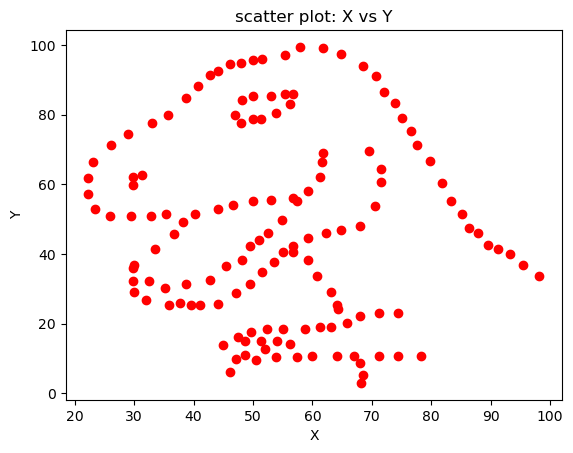

In [114]:
plt.scatter(data['x'], data['y'],color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('scatter plot: X vs Y')
plt.show()

In [115]:
X = data[['x']]
y = data[['y']]

## Step 4: Standardize the input data 

In [116]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Linear Regression

In [117]:
lin_reg=LinearRegression().fit(X_scaled,y_scaled)

y_pred = lin_reg.predict(X_scaled)

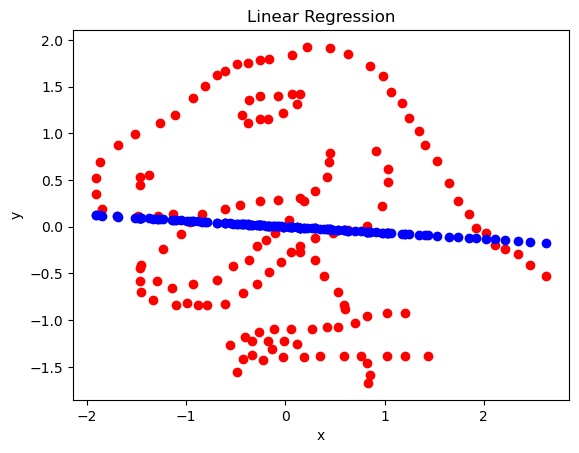

In [118]:
fig=plt.figure()
f=fig.add_subplot()
f.scatter(X_scaled,y_scaled,color='red')
f.scatter(X_scaled,lin_reg.predict(X_scaled),color='blue')
f.set_title('Linear Regression')
f.set_xlabel('x')
f.set_ylabel('y')
plt.show()

In [119]:
#Extract the Intercept (b0) from the Linear Regression Model:
b0=lin_reg.intercept_[0]

b1=lin_reg.coef_[0][0]   # Accessing the coefficient directly without an index

In [120]:
print(f"Y = {b0:.2f}+{b1:.2f}x")
print(f"R2: {lin_reg.score(X,y):.3f}")
MSE = mean_squared_error(y_scaled, y_pred)
print("Mean Squared Error:",MSE)

Y = -0.00+-0.06x
R2: -3.654
Mean Squared Error: 0.9958433802093067


Here, as we can see that the R2 Score is negative, which suggests that the model's predictions are performing poorly than that of the simple horizontal line (which is the mean of dependent variable). To conlcude with, it can be said that the chosen model is not performing well and it is indicating that the model is not suitable for the data which is given.

# KNN Regression

Applying a KNN regression model here with 13 neighbors utilising scaled input features such as X_scaled, to predict target variable that is pred_val utilising the same features that are scaled.

In [121]:
knn_regmodel= KNeighborsRegressor(n_neighbors = 13).fit(X_scaled,y_scaled)
pred_val = knn_regmodel.predict(X_scaled)

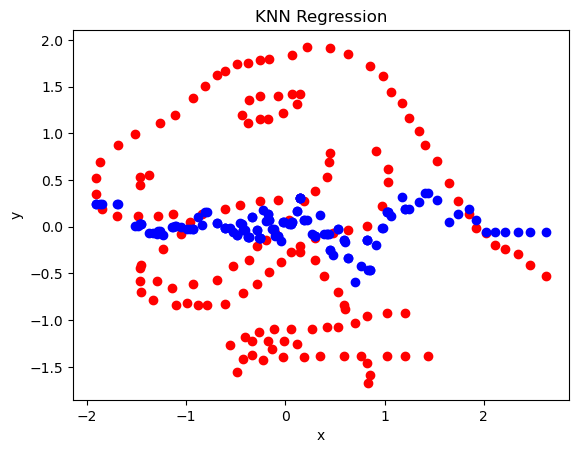

In [122]:
fig=plt.figure()
f=fig.add_subplot()
f.scatter(X_scaled,y_scaled,color='red')
f.scatter(X_scaled,knn_regmodel.predict(X_scaled),color='blue')
f.set_title('KNN Regression')
f.set_xlabel('x')
f.set_ylabel('y')
plt.show()


In [123]:
MSE = mean_squared_error(y_scaled, pred_val)
R2 = r2_score(y_scaled,pred_val)

In [124]:
print("Mean Squared Error:",MSE)
print("R2 Value:",R2)

Mean Squared Error: 0.9994600997024319
R2 Value: 0.0005399002975681189


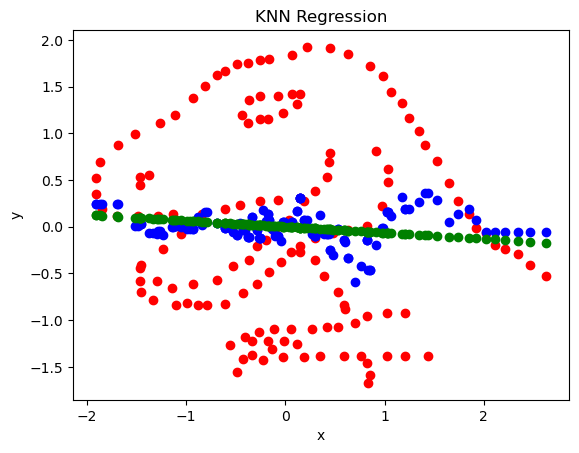

In [125]:
fig=plt.figure()
f=fig.add_subplot()
f.scatter(X_scaled,y_scaled,color='red')
f.scatter(X_scaled,knn_regmodel.predict(X_scaled),color='blue')
f.scatter(X_scaled,lin_reg.predict(X_scaled),color='green')
f.set_title('KNN Regression')
f.set_xlabel('x')
f.set_ylabel('y')
plt.show()

The Mean Squared Error is seeming to be very high in a way which indicated that both the models that were used have performed poorly. The values of the Mean Squared Error for both the models are approximately same.
When it comes to the R2 score, the value of R2 score of a linear regression model is negative which directly indicates that it is a bad fit.
Here, it can observed that the KNN performance is more better than that of the Linear regression performance (KNN performance > Linear Regression performance).
It could be estimated that the poor performance of the models is due to the fact that the existence of the complex data shape and inadequate data points.